In [1]:
from ANEMO import ANEMO
from ANEMO import read_edf

import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(ANEMO.__doc__)


    ANEMO allows you to perform Fits on data of Smooth Pursuite Eyes Movements.
    You could use the functions 'velocity', 'position' and 'saccades' already present, but also your own functions.
    It must be initialized with the parameters of the experiment :

    Parameters
    ----------
    param_exp : dict
        dictionary containing the parameters of the experiment :

        'px_per_deg': float
            number of px per degree for the experiment
                screen_width_deg = 2. * np.arctan((screen_width_cm/2) / viewing_Distance_cm) * 180/np.pi
                px_per_deg = screen_width_px / screen_width_deg


        'dir_target' : list
            list of lists for each block containing the direction of the target for each trial,
            dir_target = param_exp['dir_target'][block][trial]
                the direction of the target must be equal to -1 for left or 1 for right
        or 'p': ndarray
            ndarray containing for each trial of each block the d

# Retrieving the data

In [3]:
datafile = 'data/enregistrement_AM_2017-10-23_100057.asc'

try:
    data = read_edf(datafile, 'TRIALID')
except:
    from urllib.request import urlopen
    url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.asc'
    
    with open(datafile, 'wb') as f:
        f.write(urlopen(url).read())
    urlopen(url).close()
    f.close()
    data = read_edf(datafile, 'TRIALID')
    


expfile = 'data/enregistrement_AM_2017-10-23_100057.pkl'

try :
    with open(expfile, 'rb') as fichier :
        exp = pickle.load(fichier, encoding='latin1')
except :
    from urllib.request import urlopen
    url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.pkl'
    
    with open(expfile, 'wb') as f:
        f.write(urlopen(url).read())
    urlopen(url).close()
    f.close()
    with open(expfile, 'rb') as fichier :
        exp = pickle.load(fichier, encoding='latin1')

In [4]:
print(exp)

{'screen_width_px': 1280, 'T': 0.75, 'px_per_deg': 36.51807384230632, 'V_X_deg': 15, 'saccade_px': 632.832, 'observer': 'AM', 'N_trials': 200, 'N_frame_stim': 45, 'screen': 0, 'p': array([[[0.        , 0.64752352, 0.        ],
        [1.        , 0.30908745, 0.        ],
        [1.        , 0.0330713 , 0.        ]],

       [[1.        , 0.64752352, 0.        ],
        [0.        , 0.30908745, 0.        ],
        [0.        , 0.0330713 , 0.        ]],

       [[1.        , 0.64752352, 0.        ],
        [1.        , 0.30908745, 0.        ],
        [0.        , 0.0330713 , 0.        ]],

       ...,

       [[0.        , 0.1798759 , 0.        ],
        [1.        , 0.61318065, 0.        ],
        [0.        , 0.03527789, 0.        ]],

       [[1.        , 0.1798759 , 0.        ],
        [1.        , 0.61318065, 0.        ],
        [0.        , 0.03527789, 0.        ]],

       [[1.        , 0.1798759 , 0.        ],
        [1.        , 0.61318065, 0.        ],
        [0.   

# Demo

In [5]:
Plot = ANEMO.Plot(exp)
Fit = ANEMO.Fit(exp)

In [6]:
print(ANEMO.Plot.__doc__)


        Plot allows to display the data as well as their Fits.
        You could use the functions 'velocity', 'position' and 'saccades' already present, but also your own functions.
        It must be initialized with the parameters of the experiment
        (see ANEMO .__ doc__ for more precisions on the parameters)
        


In [7]:
print(ANEMO.Fit.__doc__)


        Fit allows you to perform Fits on Smooth Pursuite Eyes Movements data.
        You could use the functions 'velocity', 'position' and 'saccades' already present, but also your own functions.
        It must be initialized with the parameters of the experiment
        (see ANEMO .__ doc__ for more precisions on the parameters)
        


In [8]:
# number of the trial and block that you want to display with plot_data and plot_fit
trial=11
block=1

# for plot_Full_data and Fit_full
# display the first ten trials divided into two blocks of 5 trials each
data1 = data[:10]
N_blocks = 2
N_trials = 5

In [9]:
def demo(data_show):
    fig, axs = Plot.plot_equation(equation='fct_%s'%data_show)
    plt.show()
    fig, axs = Plot.plot_data(data=data, show=data_show, trials=trial, block=block)
    plt.show()
    fig, axs = Plot.plot_fit(data=data, equation='fct_%s'%data_show, trials=trial, block=block)
    plt.show()
    
    print('\nPlot Full Data\n---------------\n')
    Plot.plot_Full_data(data=data1, show=data_show, N_blocks=N_blocks, N_trials=N_trials,
                    file_fig='result/%s'%data_show)
    print('\nfigure data saved in result/%s\n------------------------------\n'%data_show)
    
    
    print('\nPlot Full Fit\n---------------\n')
    param = Fit.Fit_full(data=data1, equation='fct_%s'%data_show, plot=True,
                     N_blocks=N_blocks, N_trials=N_trials, file_fig='result/Fit_%s'%data_show)
    print('\nfigure fit saved in result/Fit_%s'%data_show)

    # saves the fit parameters
    with open('result/param_Fit_%s_AM.pkl'%data_show, 'wb') as fichier:
        f = pickle.Pickler(fichier)
        f.dump(param)
    print('param fit saved in result/param_Fit_%s_AM\n------------------------------\n'%data_show)

## Demo velocity

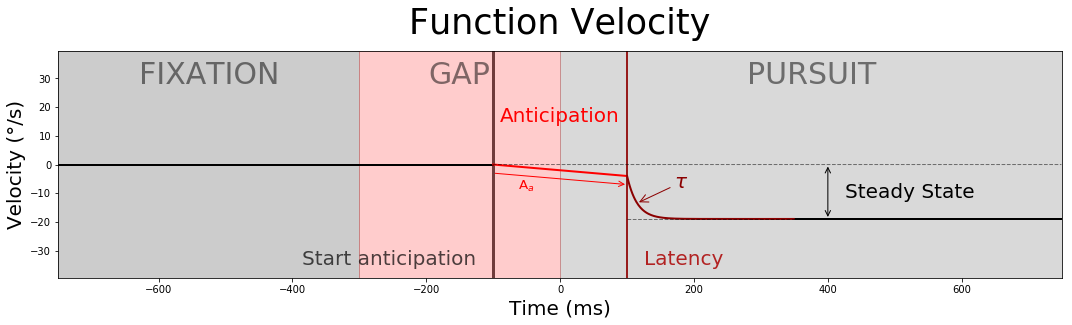

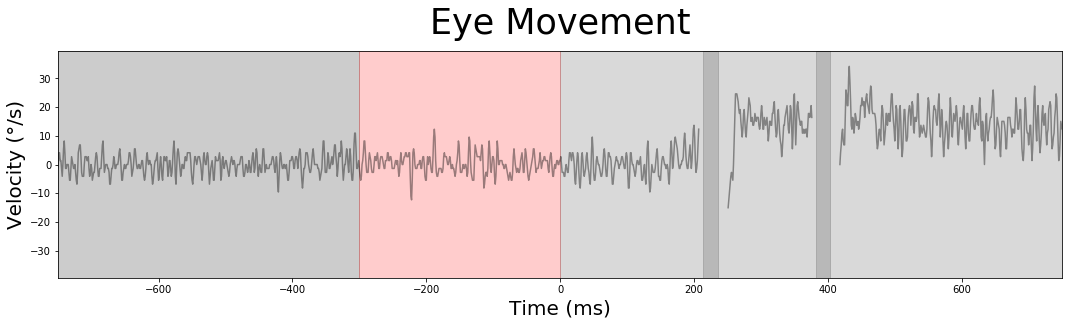

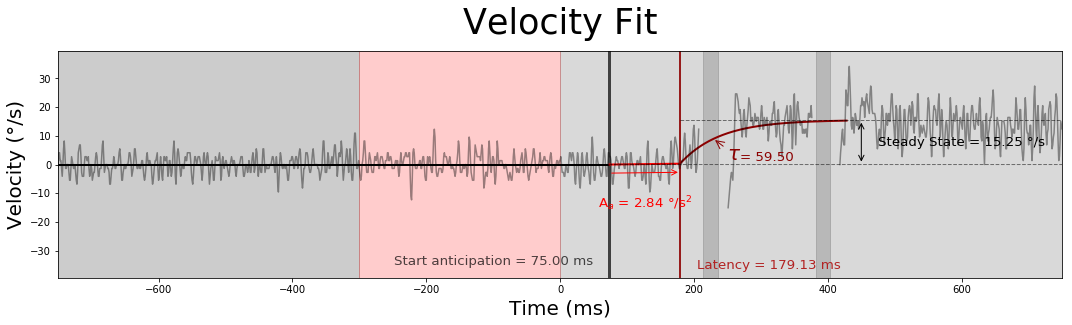


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/velocity
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_velocity
param fit saved in result/param_Fit_velocity_AM
------------------------------



In [10]:
demo('velocity')

## Demo position

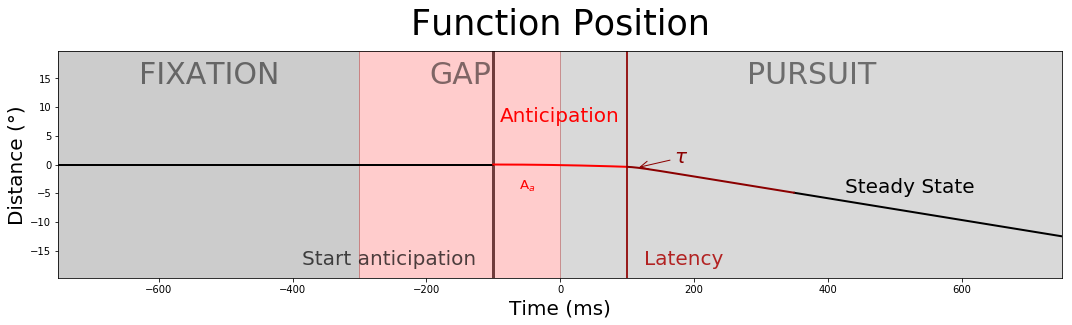

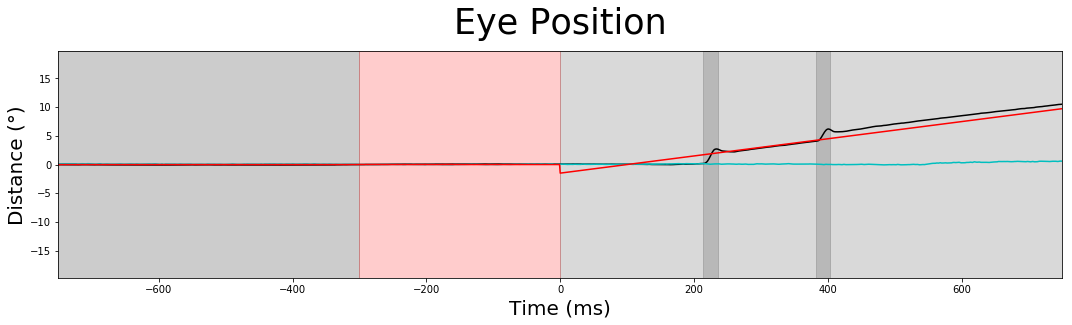

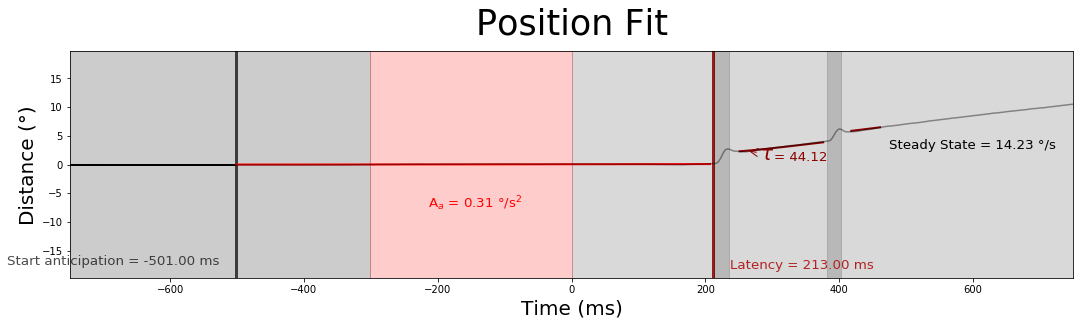


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/position
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_position
param fit saved in result/param_Fit_position_AM
------------------------------



In [11]:
demo('position')

## Demo saccade

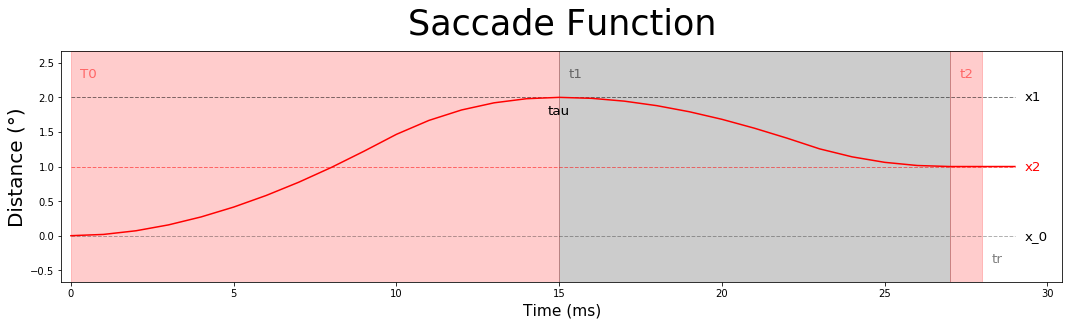

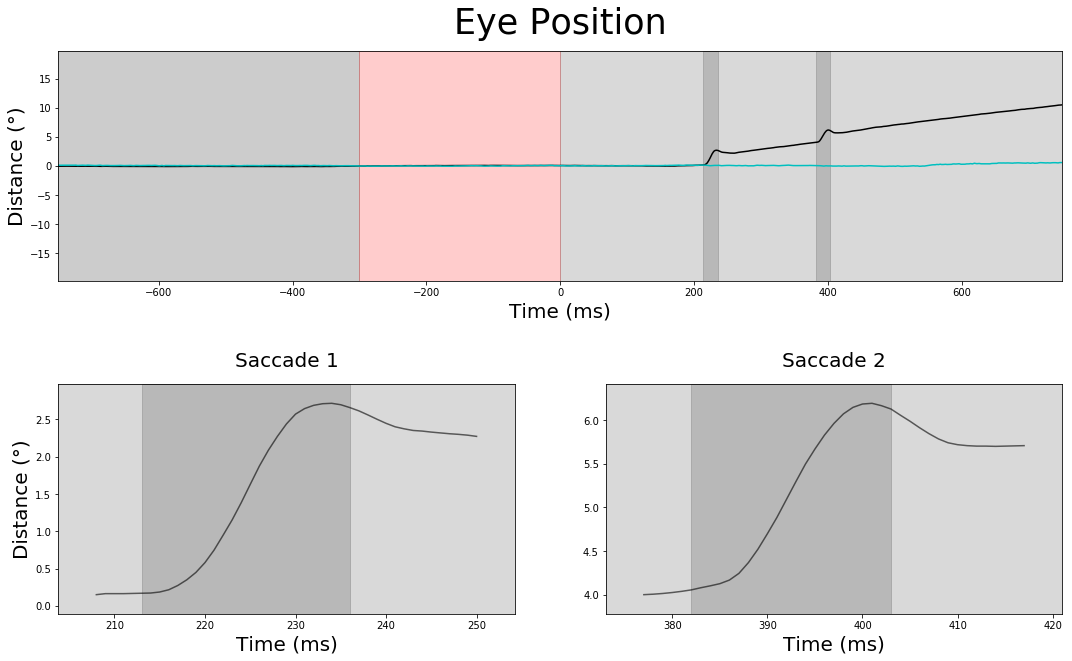

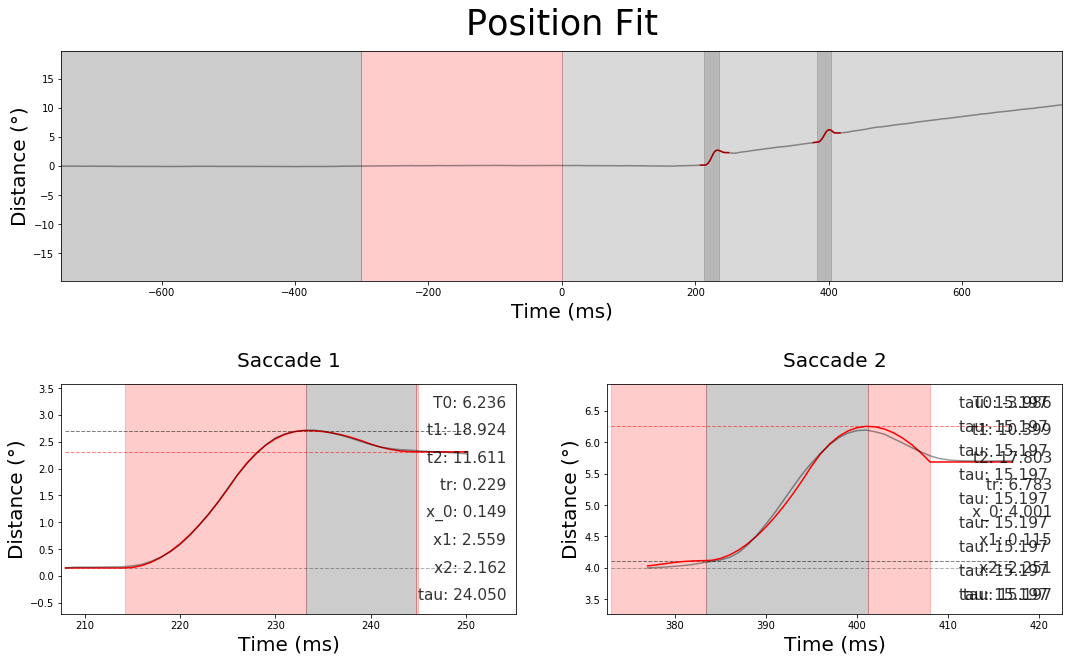


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/saccade
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_saccade
param fit saved in result/param_Fit_saccade_AM
------------------------------



In [12]:
demo('saccade')

# Retrieving the parameters

In [13]:
def Retrieving_param(data_show):
    with open('result/param_Fit_%s_AM.pkl'%data_show, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    print('\nParam recorded\n---------------\n')
    print(param.keys())
    
    print('\nFor the first trial\n---------------\n')
    for name in param.keys() :
        if name != 'fit' and name!='observer' :
            print(name, '=', param[name][0][0])

In [14]:
Retrieving_param('velocity')


Param recorded
---------------

dict_keys(['observer', 'latence', 'maxi', 'old_max', 'tau', 'old_anti', 'old_latence', 'v_anti', 'fit', 'start_anti'])

For the first trial
---------------

latence = 193.00000193919777
maxi = 14.658510885873559
old_max = 15.093442067421275
tau = 72.24178510738794
old_anti = -3.286044070072851
old_latence = nan
v_anti = -1.811887830063398
start_anti = -62.34902432998274


In [15]:
Retrieving_param('position')


Param recorded
---------------

dict_keys(['observer', 'latence', 'maxi', 'old_max', 'tau', 'old_anti', 'old_latence', 'v_anti', 'fit', 'start_anti'])

For the first trial
---------------

latence = 214.999999998543
maxi = 13.589068743210039
old_max = 15.093442067421275
tau = 79.9999999838089
old_anti = -3.286044070072851
old_latence = nan
v_anti = -0.8644675853667181
start_anti = -500.9999998929315


In [16]:
Retrieving_param('saccade')


Param recorded
---------------

dict_keys(['x2', 'observer', 't1', 't2', 'x_0', 'x1', 'tau', 'tr', 'T0', 'fit'])

For the first trial
---------------

x2 = [0.26429867842356636, -2.4104404690906653, -1.5019277523822971, -0.9723104486959242]
t1 = [13.80368384554161, 19.34646634699066, 17.55825313325032, 17.57105648565289]
t2 = [11.070420107104905, 12.992243992733844, 10.012578595149208, 10.034011617461523]
x_0 = [-0.12880606816552265, -0.22160360416736463, -4.014450505605895, -10.217275704455709]
x1 = [0.5511798880079333, -3.8108508303072934, -2.4743874061130833, -1.5283121111871951]
tau = [14.362669972043989, 27.15075127566345, 17.65312776832085, 5.494692034910924]
tr = [4.389951441838846, 0.0038193190626487072, 1.1785212663955997, 2.8482170174241124]
T0 = [1.1802896405148928, 8.192986532151906, 6.250646971678023, 3.546714860064135]
